In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv(r'E:\Personal Projc\ineuron(thyroid detection)\Data\thyroid0387.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]


### Giving names to features

In [4]:
feature_name=['age',
'sex',
'on thyroxine',
'query on thyroxine',
'on antithyroid medication',
'sick',
'pregnant',
'thyroid surgery',
'I131 treatment',
'query hypothyroid',
'query hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH measured',
'TSH',
'T3 measured',
'T3',
'TT4 measured',
'TT4',
'T4U measured',
'T4U',
'FTI measured',
'FTI',
'TBG measured',
'TBG',
'referral source',
'target']

In [5]:
df.columns=feature_name
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9168,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9169,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9170,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

### Dropping the column which are not use

In [7]:
df.drop(['referral source','T3 measured','TSH measured','TSH measured','TT4 measured','T4U measured',
         'FTI measured','TBG measured'],axis=1,inplace=True)


In [8]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,?,?,?,?,?,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128,?,?,?,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,11,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,26,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,36,S[840803047]


In [9]:
df.shape

(9172, 23)

In [10]:
#### selecting target column and alloting as variable
target=df.target
create=target.str.split('([A-Z,a-z])',expand=True)
create=create[1]
target=create.replace({None:'Z'})  ### Z is non type
df.target=target  ### updating target value in df
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,?,?,?,?,?,Z
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128,?,?,?,Z
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,11,Z
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,26,Z
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,?,?,?,?,?,36,S


In [11]:
df.target.unique()


array(['Z', 'S', 'F', 'A', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'C', 'O', 'H', 'D', 'P', 'B', 'E'], dtype=object)

"""In experiments with an earlier version of this archive, decision trees were derived for the most frequent classes of comments, namely

hyperthyroid conditions (A, B, C, D)

hypothyroid conditions (E, F, G, H)

binding protein (I, J)

general health (K)

replacement therapy (L, M, N)

discordant results (R)

None values(Z)
"""

In [12]:
#now we want to impute null values  but in this case null vales markes as '?'.s0,we can replace it with nan
df=df.replace(['?'],np.nan)

In [13]:
df.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2604
TT4                           442
T4U                           809
FTI                           802
TBG                          8823
target                          0
dtype: int64

In [14]:
### Dropping TBG column bcoz it contains more null values
df.drop('TBG',axis=1,inplace=True)

In [15]:
df.shape

(9172, 22)

In [16]:
df.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2604
TT4                           442
T4U                           809
FTI                           802
target                          0
dtype: int64

In [17]:
### checking mode value for sex column
df['sex'].mode().iloc[0]

'F'

In [18]:
### for categorical value we fill nan with mode
df['sex']=df['sex'].fillna(df['sex'].mode().iloc[0])

In [19]:
### for numerical value we fill nan with median
df['TSH']=df['TSH'].fillna(df['TSH'].median())
df['T3']=df['T3'].fillna(df['T3'].median())
df['TT4']=df['TT4'].fillna(df['TT4'].median())
df['T4U']=df['T4U'].fillna(df['T4U'].median())
df['FTI']=df['FTI'].fillna(df['FTI'].median())



In [20]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [21]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,1.9,104.0,0.96,109.0,Z
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,0.96,109.0,Z
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.4,1.9,104.0,0.96,109.0,Z
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.4,1.9,104.0,0.96,109.0,Z
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.4,1.9,104.0,0.96,109.0,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [23]:
#### Converting object to numeric we have some feature numberic but showing object
df['TSH']=pd.to_numeric(df['TSH'])
df['T3']=pd.to_numeric(df['T3'])
df['TT4']=pd.to_numeric(df['TT4'])
df['T4U']=pd.to_numeric(df['T4U'])
df['FTI']=pd.to_numeric(df['FTI'])



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   object 
 2   on thyroxine               9172 non-null   object 
 3   query on thyroxine         9172 non-null   object 
 4   on antithyroid medication  9172 non-null   object 
 5   sick                       9172 non-null   object 
 6   pregnant                   9172 non-null   object 
 7   thyroid surgery            9172 non-null   object 
 8   I131 treatment             9172 non-null   object 
 9   query hypothyroid          9172 non-null   object 
 10  query hyperthyroid         9172 non-null   object 
 11  lithium                    9172 non-null   object 
 12  goitre                     9172 non-null   object 
 13  tumor                      9172 non-null   objec

<AxesSubplot:>

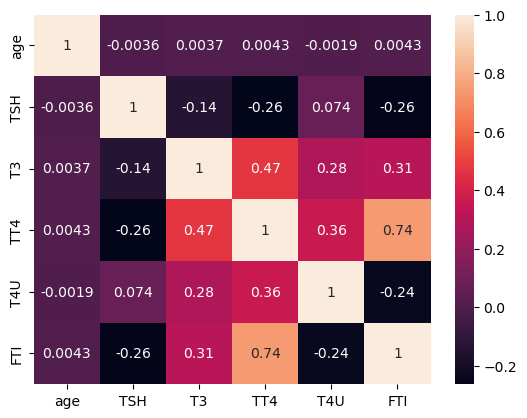

In [25]:
### plotting heatmap for seeing correlation but for all feature we cant see correlation so we should to label encoding
sns.heatmap(df.corr(),annot=True)

In [26]:
### Label encoding
cols=df.select_dtypes(include=['object'])
cols.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,Z
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
2,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,Z
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,S


In [27]:
for i in cols.columns:
    try:
        df[i]=LabelEncoder().fit_transform(df[i])
    except:
        continue

In [28]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.3,1.9,104.0,0.96,109.0,19
1,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.6,1.9,128.0,0.96,109.0,19
2,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.4,1.9,104.0,0.96,109.0,19
3,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.4,1.9,104.0,0.96,109.0,19
4,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.4,1.9,104.0,0.96,109.0,18


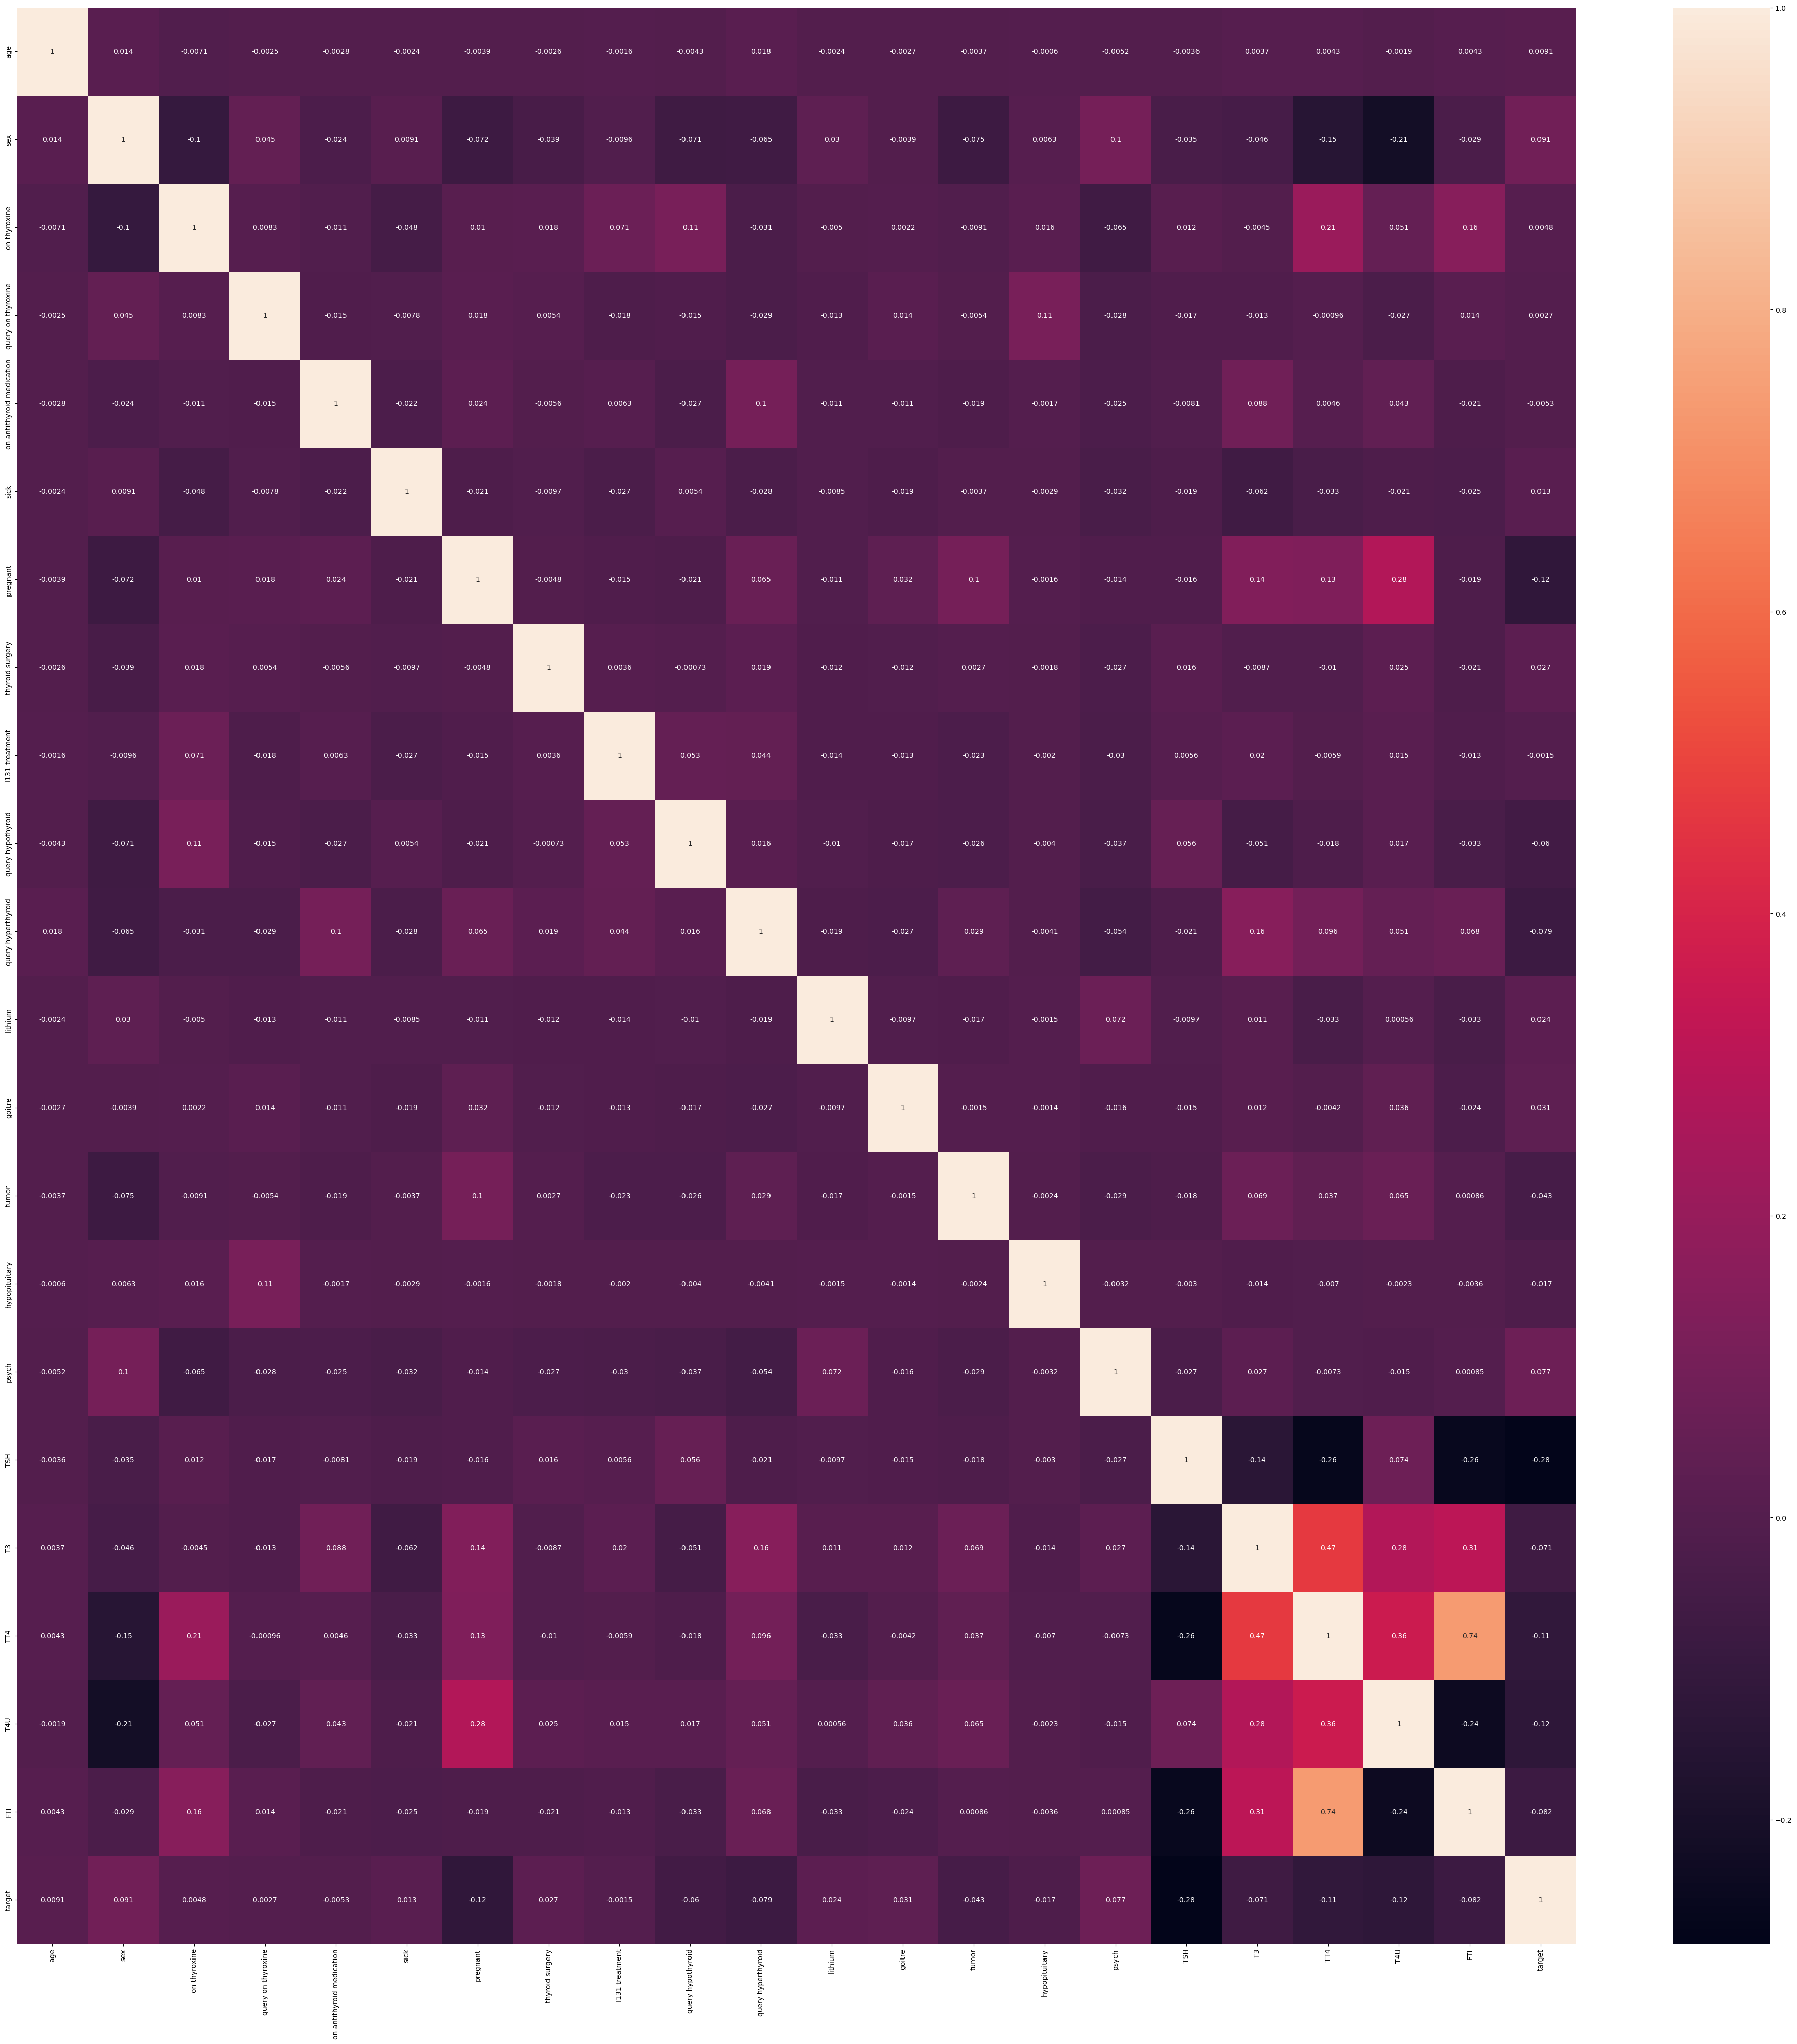

In [29]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
df.corr().max()

age                          1.0
sex                          1.0
on thyroxine                 1.0
query on thyroxine           1.0
on antithyroid medication    1.0
sick                         1.0
pregnant                     1.0
thyroid surgery              1.0
I131 treatment               1.0
query hypothyroid            1.0
query hyperthyroid           1.0
lithium                      1.0
goitre                       1.0
tumor                        1.0
hypopituitary                1.0
psych                        1.0
TSH                          1.0
T3                           1.0
TT4                          1.0
T4U                          1.0
FTI                          1.0
target                       1.0
dtype: float64

In [31]:
### correlation
for a in range (len(df.corr())):
    for b in range(a):
        if (df.corr().iloc[a,b])>=.7:
            print(df.corr().columns[b])

TT4


In [32]:
### So we can see TT4 is high correlation,we can drop
df.drop('TT4',axis=1,inplace=True)

In [33]:
df.shape

(9172, 21)

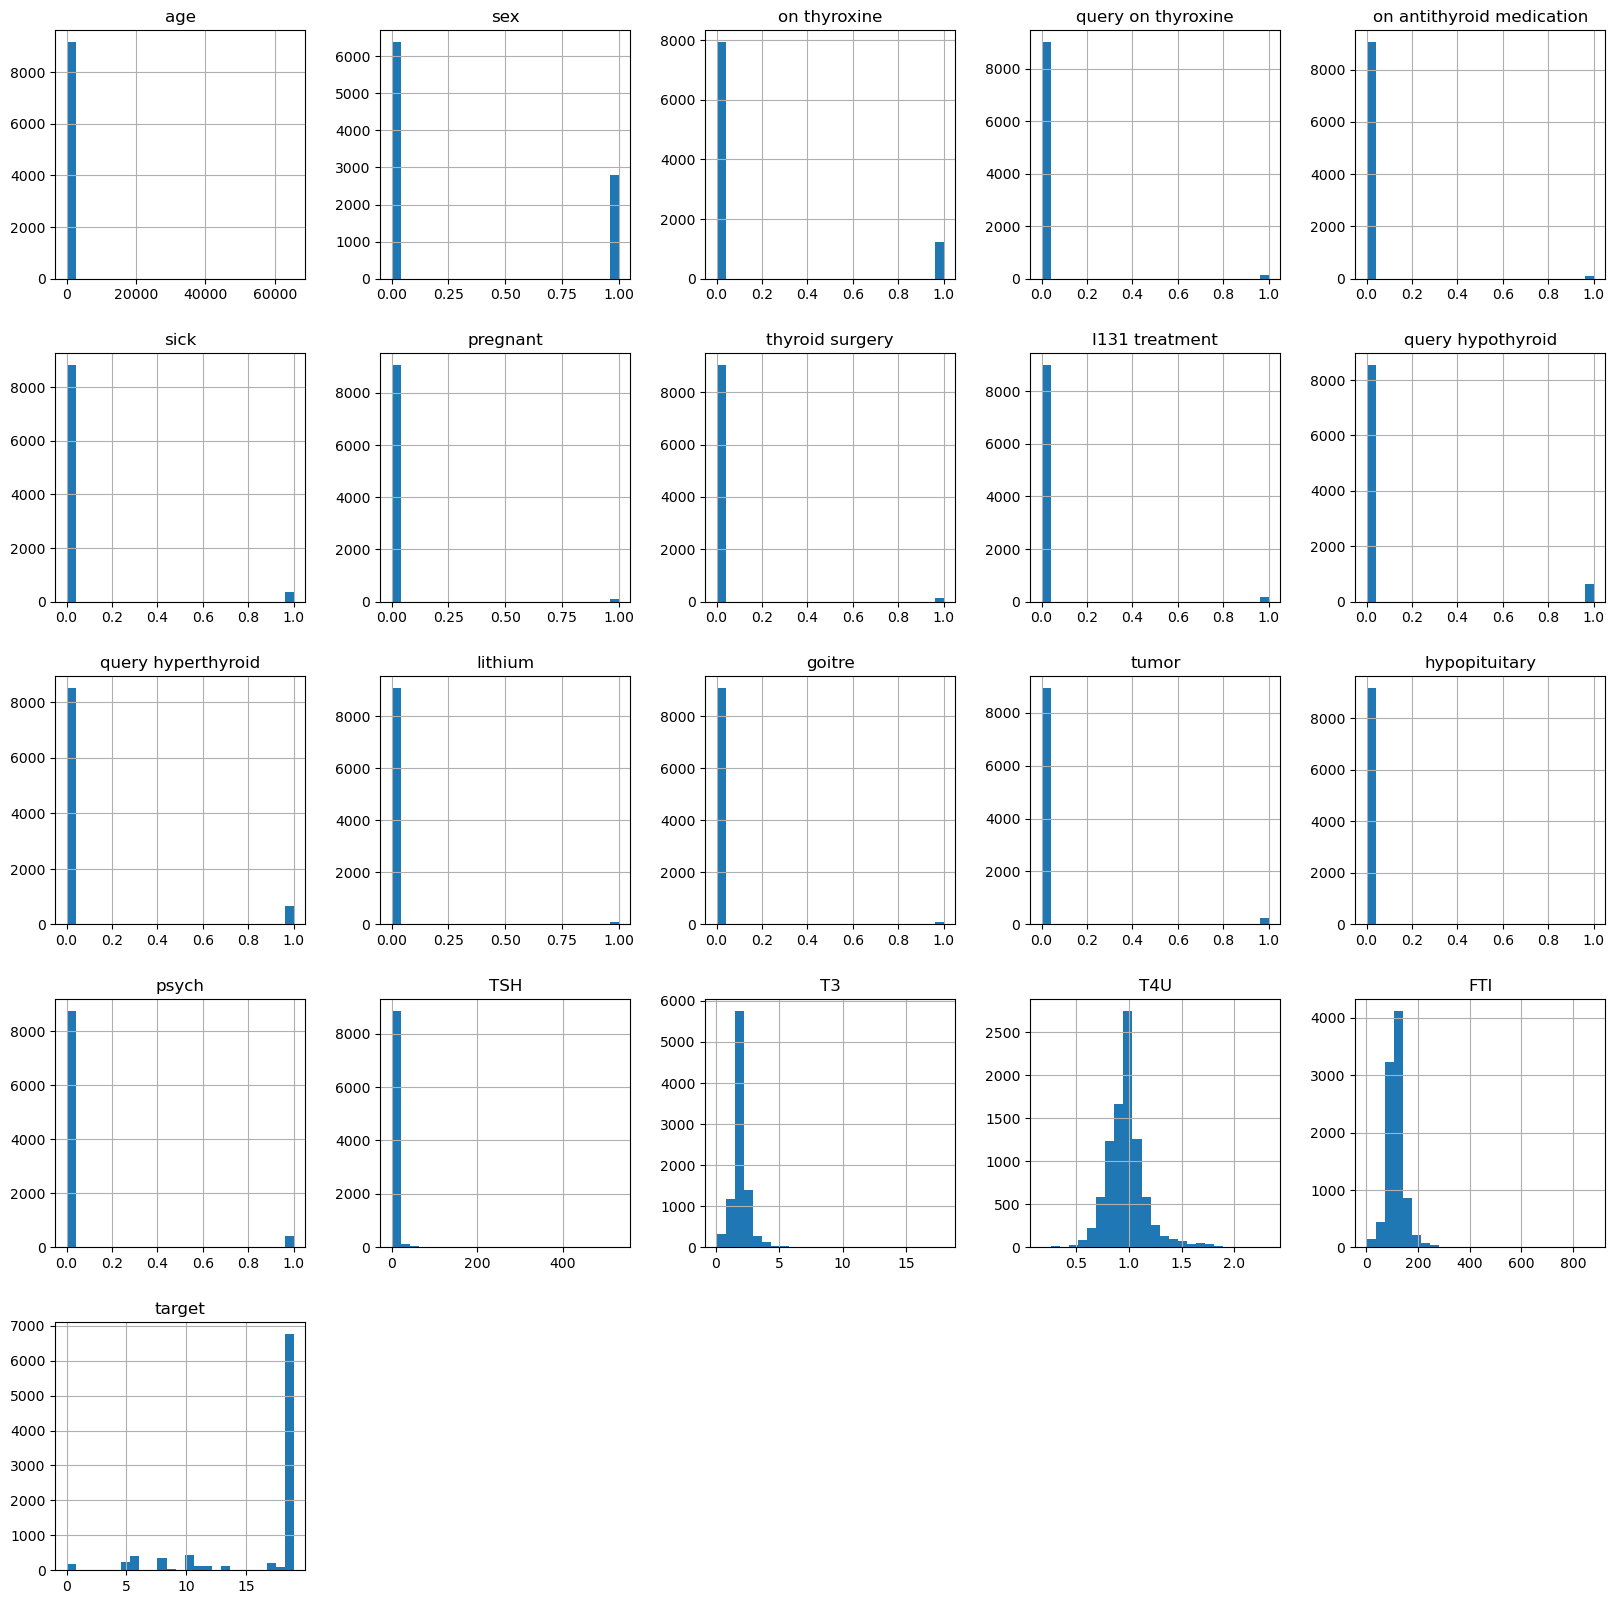

In [34]:
df.hist(bins=25,figsize=(20,20));

In [35]:
### Data preprocessing
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
data=x
len(y.unique())

20

In [37]:
### PCA Technique
pca=PCA(n_components=10).fit_transform(x)

In [38]:
pca

array([[-4.45561191e+01, -3.17367096e+00, -5.35704036e+00, ...,
         8.56989591e-01, -1.65616290e-03, -6.97420427e-02],
       [-4.45562098e+01, -3.44669836e+00, -4.08660999e+00, ...,
        -7.89602189e-03, -3.72996845e-02, -5.39334402e-02],
       [-3.25561920e+01, -3.40611232e+00, -4.28163568e+00, ...,
        -4.69670547e-01,  8.70402283e-02,  3.14229695e-03],
       ...,
       [-4.55910339e+00, -2.29643129e+01, -8.48591764e+00, ...,
        -1.70042874e-02, -7.75105196e-02, -5.35313703e-02],
       [-2.65592541e+01, -2.39377499e+01, -8.69592628e+00, ...,
        -1.27471835e-02, -3.84126190e-02, -5.63461088e-02],
       [-4.25625989e+01, -4.64216001e+01, -1.35319478e+01, ...,
         8.44006854e-01, -4.45593437e-02, -7.42081055e-02]])

In [39]:
x_pca=pd.DataFrame(data=pca,columns=['comp_1','comp_2','comp_3','comp_4','comp_5','comp_6','comp_7',
                                    'comp_8','comp_9','comp_10'])

In [40]:
x_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10
0,-44.556119,-3.173671,-5.357040,-0.037151,-0.343814,0.019291,0.365002,0.856990,-0.001656,-0.069742
1,-44.556210,-3.446698,-4.086610,-0.019277,-0.276060,0.180989,-0.102125,-0.007896,-0.037300,-0.053933
2,-32.556192,-3.406112,-4.281636,0.039060,-0.315299,0.249356,0.766114,-0.469671,0.087040,0.003142
3,-37.556196,-3.405757,-4.281873,-0.019680,-0.276340,0.180843,-0.102100,-0.007829,-0.037309,-0.053981
4,-41.556196,-3.405128,-4.282026,-0.019675,-0.276317,0.180849,-0.102086,-0.007837,-0.037312,-0.053983


In [41]:
scaled=MinMaxScaler()
for i in x_pca.columns:
    x_pca[i]=scaled.fit_transform(x_pca[[i]])

array([[<AxesSubplot:title={'center':'comp_1'}>,
        <AxesSubplot:title={'center':'comp_2'}>,
        <AxesSubplot:title={'center':'comp_3'}>],
       [<AxesSubplot:title={'center':'comp_4'}>,
        <AxesSubplot:title={'center':'comp_5'}>,
        <AxesSubplot:title={'center':'comp_6'}>],
       [<AxesSubplot:title={'center':'comp_7'}>,
        <AxesSubplot:title={'center':'comp_8'}>,
        <AxesSubplot:title={'center':'comp_9'}>],
       [<AxesSubplot:title={'center':'comp_10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

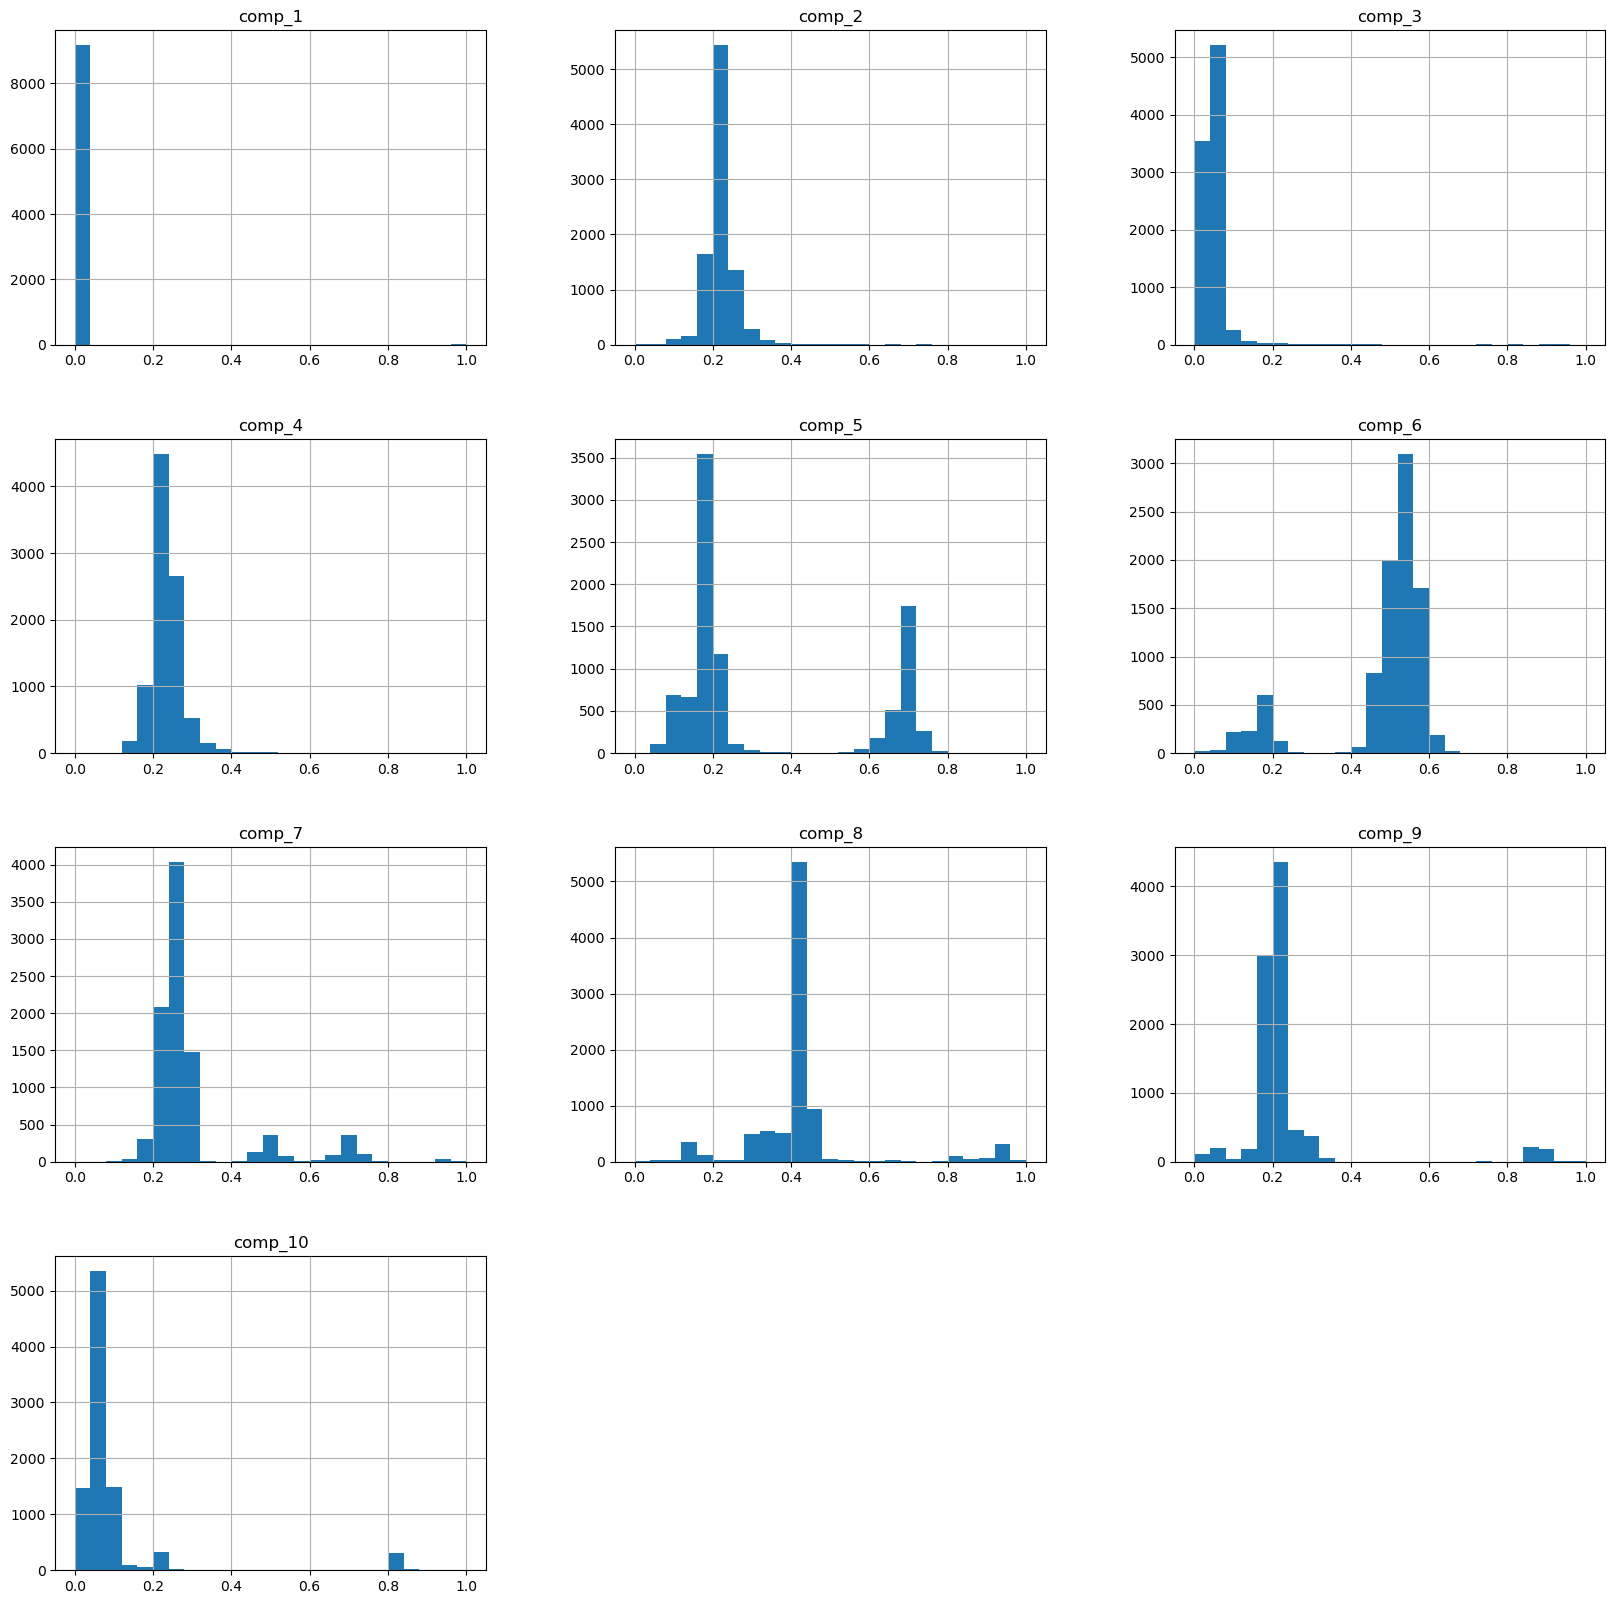

In [42]:
x_pca.hist(bins=25,figsize=(20,20))

In [43]:
x_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10
0,0.000427,0.217548,0.038212,0.234203,0.156810,0.489489,0.489980,0.939149,0.230517,0.035735
1,0.000427,0.217265,0.040672,0.235248,0.191567,0.554206,0.245529,0.421427,0.205135,0.048389
2,0.000611,0.217307,0.040294,0.238660,0.171438,0.581569,0.699886,0.145008,0.293679,0.094074
3,0.000534,0.217307,0.040294,0.235225,0.191424,0.554148,0.245542,0.421467,0.205128,0.048350
4,0.000473,0.217308,0.040293,0.235225,0.191435,0.554150,0.245549,0.421462,0.205126,0.048349


In [44]:
### Spliting the data into train test split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.33,random_state=42)

In [45]:
### Building a model
lst=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,AdaBoostClassifier
     ,GradientBoostingClassifier,SVC,KNeighborsClassifier,XGBClassifier]
for i in lst:
    model=i().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(i)
    print('*********************************************************************************************')
    print(accuracy_score(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    print('*********************************************************************************************')
    

<class 'sklearn.linear_model._logistic.LogisticRegression'>
*********************************************************************************************
0.74000660720185
              precision    recall  f1-score   support

           0       0.06      0.27      0.09        11
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.26      0.83      0.40        24
           6       0.01      1.00      0.01         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15      

<class 'sklearn.svm._classes.SVC'>
*********************************************************************************************
0.7585067723818962
              precision    recall  f1-score   support

           0       0.39      0.57      0.46        37
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.60      0.88      0.71        52
           6       0.02      0.50      0.04         6
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.05      0.44      0.09        18
          11       0.00      0.00      0.00         0
          12       0.11      1.00      0.19         5
          13       0.12      0.44      0.19         9
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.

In [46]:
### Got F1 score as 88% with XG boost with PCA

In [47]:
### Without PCA

In [48]:
for i in data.columns:
    print('n\n')
    print(i)
    print(data[i].unique())

n

age
[   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
n

sex
[0 1]
n

on thyroxine
[0 1]
n

query on thyroxine
[0 1]
n

on antithyroid medication
[0 1]
n

sick
[0 1]
n

pregnant
[0 1]
n

thyroid surgery
[0 1]
n

I131 treatment
[0 1]
n

query hypothyroid
[1 0]
n

query hyperthyroid
[0 1]
n

lithium
[0 1]
n

goitre
[0 1]
n

tumor
[0 1]
n

hypopituitary
[0 1]
n

psych
[0 1]
n

TSH
[3.0000000e-01 1.6000000e+00 1.4000000e+00 7.0000000e-01

In [49]:
cols=['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    data[i]=scaled.fit_transform(data[[i]])

In [50]:
X=data
Y=df['target']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.33,random_state=42)


In [52]:
lsts=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,AdaBoostClassifier
     ,GradientBoostingClassifier,SVC,KNeighborsClassifier,XGBClassifier]
for i in lsts:
    models=i().fit(X_train,Y_train)
    Y_pred=models.predict(X_test)
    print(i)
    print('***************************************************************************')
    print(accuracy_score(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print('********************************************************************************')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
***************************************************************************
0.7532210109018831
              precision    recall  f1-score   support

           0       0.44      0.07      0.13        54
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           5       0.88      0.30      0.45        77
           6       0.00      0.00      0.00       133
           7       0.00      0.00      0.00         2
           8       0.84      0.29      0.43       125
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00       160
          11       0.00      0.00      0.00        39
          12       1.00      0.04      0.08        47
          13       1.00      0.06      0.11        34
          14       0.00      0.00      0.00         4
          15       0.00      0.00 

<class 'sklearn.svm._classes.SVC'>
***************************************************************************
0.759167492566898
              precision    recall  f1-score   support

           0       0.61      0.20      0.31        54
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           5       0.93      0.52      0.67        77
           6       0.50      0.01      0.01       133
           7       0.00      0.00      0.00         2
           8       0.78      0.28      0.41       125
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00       160
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00        47
          13       1.00      0.03      0.06        34
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
      

In [53]:
###Got F1 score as 91% with XG boost without PCA

In [54]:
final_model=XGBClassifier()
final_model.fit(X_train,Y_train)
final_pred=final_model.predict(X_test)
print(classification_report(Y_test,final_pred))
print(accuracy_score(Y_test,final_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        54
           1       0.50      0.14      0.22         7
           2       0.60      0.75      0.67         4
           3       1.00      1.00      1.00         3
           5       0.94      0.96      0.95        77
           6       0.92      0.98      0.95       133
           7       0.00      0.00      0.00         2
           8       0.80      0.71      0.75       125
           9       1.00      0.43      0.60        14
          10       0.84      0.84      0.84       160
          11       0.44      0.41      0.43        39
          12       0.98      0.96      0.97        47
          13       0.66      0.68      0.67        34
          14       0.40      0.50      0.44         4
          15       0.00      0.00      0.00         2
          16       0.67      0.33      0.44         6
          17       0.78      0.69      0.73        65
          18       0.21    

In [57]:
from pickle import dump


In [59]:
dump(final_model,open('Thdd.pkl','wb'))

In [56]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
0,0.000427,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000557,0.103064,0.365741,0.122328
1,0.000427,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003009,0.103064,0.365741,0.122328
2,0.000610,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.002632,0.103064,0.365741,0.122328
3,0.000534,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002632,0.103064,0.365741,0.122328
4,0.000473,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002632,0.103064,0.365741,0.122328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,0.000839,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.002632,0.103064,0.305556,0.085948
9168,0.000320,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002632,0.103064,0.347222,0.110960
9169,0.001038,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002632,0.103064,0.509259,0.099591
9170,0.000702,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002632,0.103064,0.314815,0.098454
